<span style="font-size:25px; font-weight:bold">Name: Wondwosen Muhea</span><br>
<span style="font-size:20px; font-weight:bold">Course: Advanced Big Data and Data Mining (MSCS-634-M40) </span><br>
<span style="font-size:16px; font-weight:bold">Lab 4: Regression Analysis with Regularization Techniques</span><br>

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load Data

In [2]:
# Load the dataset
data, target = load_diabetes(return_X_y=True, as_frame=True)
print(load_diabetes()["DESCR"])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
df = pd.concat([data, target], axis=1)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


#### 1.1. Checking the data for cleaning

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Count duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# Print data types of all columns
data_types = df.dtypes
print("\nData Types:\n", data_types)

Missing Values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Number of Duplicate Rows: 0

Data Types:
 age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


#### 1.2 Targest distribution check

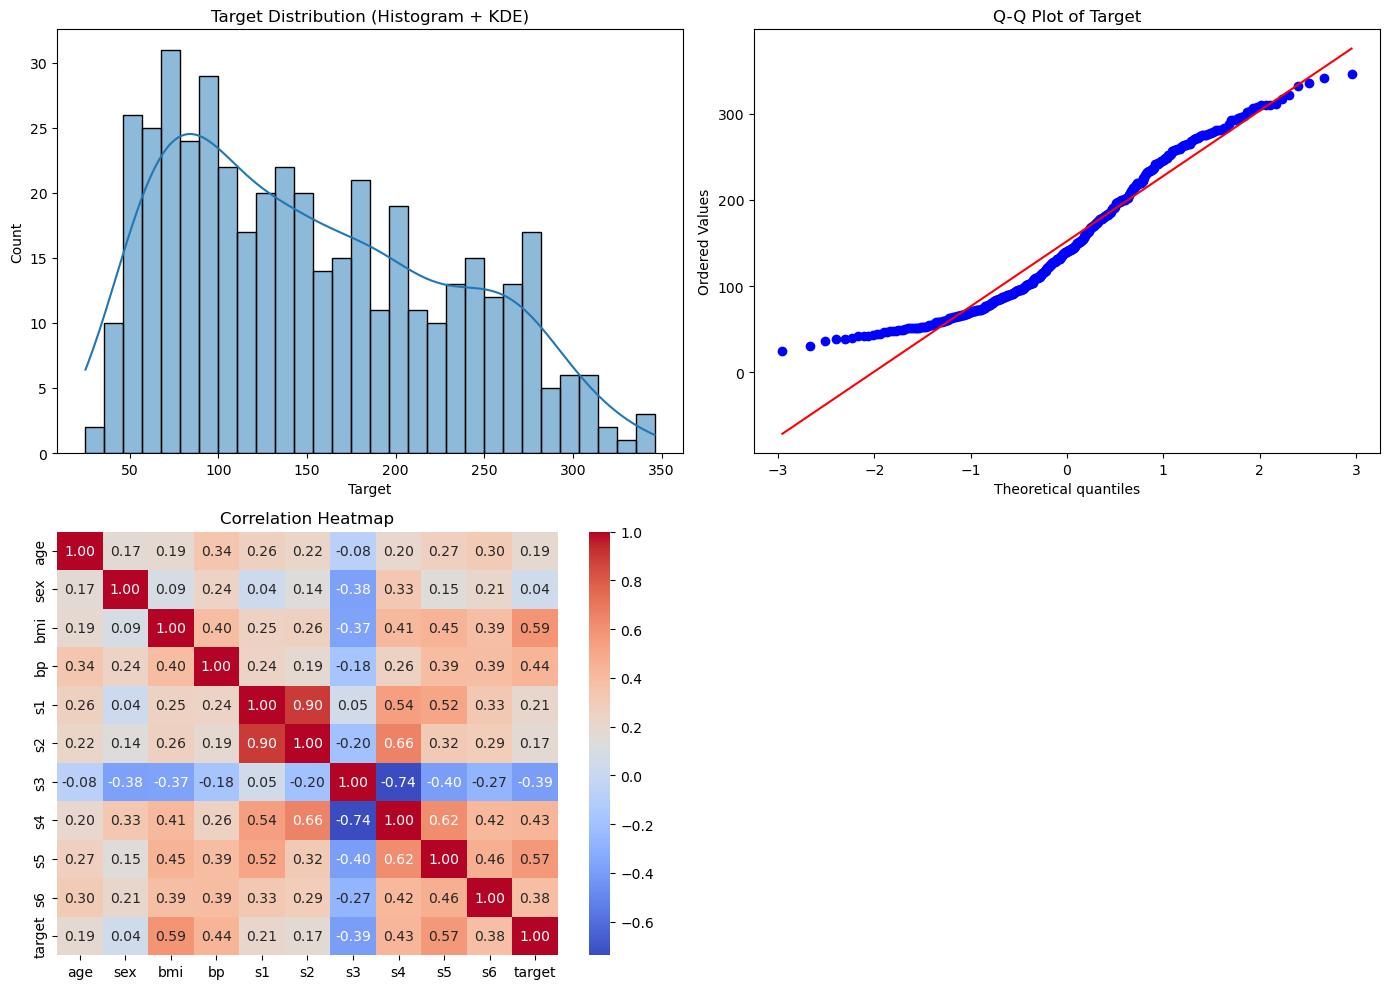

In [5]:
# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram of target
sns.histplot(df['target'], kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Target Distribution (Histogram + KDE)')
axes[0, 0].set_xlabel('Target')

# 2. Q-Q plot
stats.probplot(df['target'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Target')

# 3. Heatmap of correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# Remove empty subplot (optional)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

### Analysis
1. We can see that the features data have no missing values
2. Multicollinearity observed among features like s1, s2, and s3
3. All features evern catagorical ones are standardized and number formatted making them suotable for modeling
4. From the correlation martix and heatmap plot, we can see that the features and the target has linear relationship
5. From the above plots, the target histogram shows a slight right skew, not extreme.
6. The Q-Q plot shows deviation from the diagonal at higher values, confirming non-normality in the upper tail.
7. The target is not perfectly symmetric and not strictly normal, but it's also not heavily skewed.
8. Based on the above analysis, we can create the regression models directly from the data.

### 2. Simple Linear Regression using BMI feature

In [6]:
# Use 'bmi' as the independent variable
X = df[['bmi']]  # 2D array
y = df['target'] # 1D array

# Split the data: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [7]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  52.26
MSE:  4061.83
RMSE: 63.73
R²:   0.23


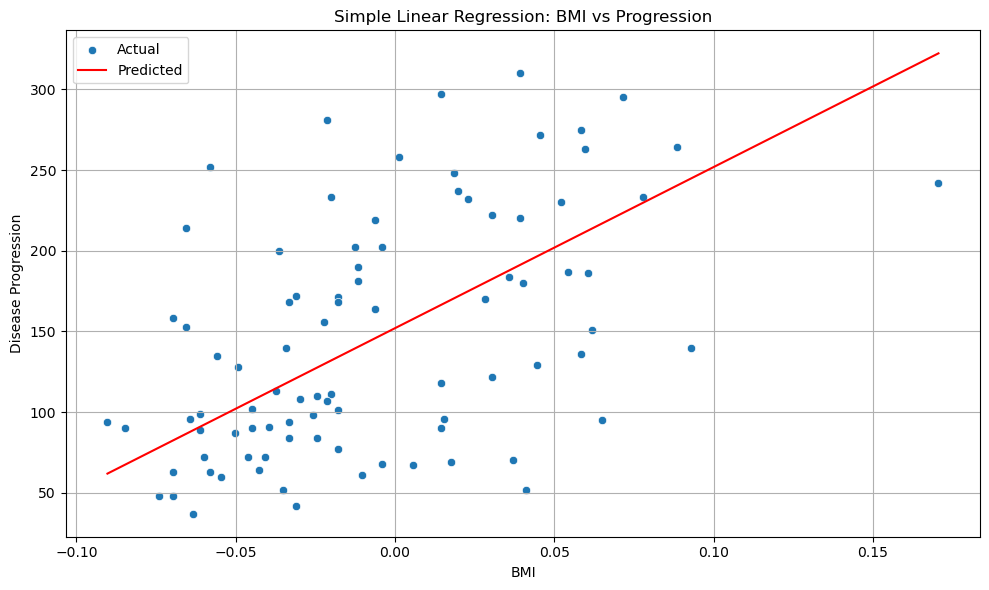

In [8]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['bmi'], y=y_test, label='Actual')
sns.lineplot(x=X_test['bmi'], y=y_pred, color='red', label='Predicted')
plt.title('Simple Linear Regression: BMI vs Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Multiple Regression

In [9]:
# Define features and target
Xm = df.drop(columns='target')
ym = df['target']

# Train-test split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.20, random_state=42)

# Train the model
model = LinearRegression()
model.fit(Xm_train, ym_train)

# Make predictions
ym_pred = model.predict(Xm_test)

# Evaluate performance
mae = mean_absolute_error(ym_test, ym_pred)
mse = mean_squared_error(ym_test, ym_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ym_test, ym_pred)
# Print metrics
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


MAE:  42.79
MSE:  2900.19
RMSE: 53.85
R²:   0.45


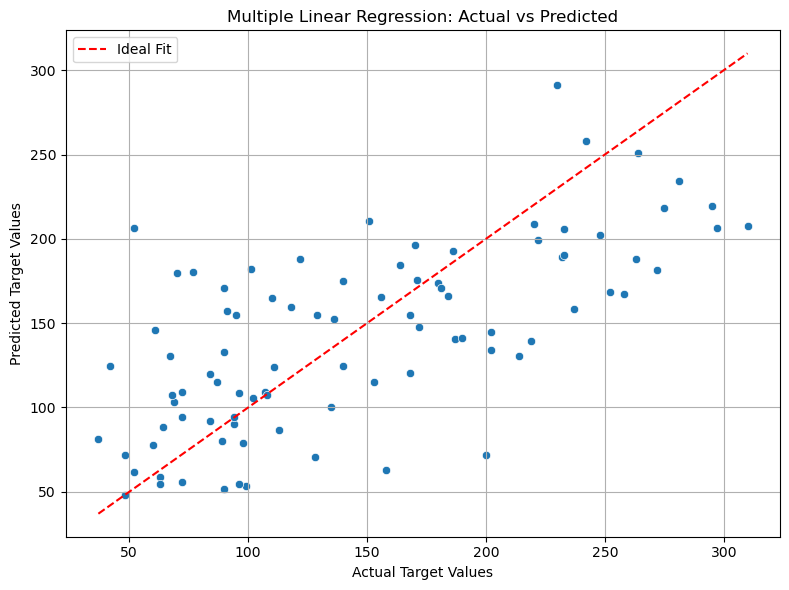

In [10]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ym_test, y=ym_pred)
plt.plot([ym_test.min(), ym_test.max()], [ym_test.min(), ym_test.max()], '--r', label='Ideal Fit')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Polynomial Regression

In [11]:
# Use one feature for visualization (e.g., 'bmi')
Xp = df[['bmi']]
yp = df['target']

# Split dataset
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.25, random_state=42)

# Helper function for training and evaluation
def evaluate_model(Xp_train, Xp_test, yp_train, yp_test, degree):
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    Xp_train_poly = poly.fit_transform(Xp_train)
    Xp_test_poly = poly.transform(Xp_test)

    # Train linear model on polynomial features
    model = LinearRegression()
    model.fit(Xp_train_poly, yp_train)
    yp_pred = model.predict(Xp_test_poly)

    # Metrics
    mse = mean_squared_error(yp_test, yp_pred)
    mae = mean_absolute_error(yp_test, yp_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(yp_test, yp_pred)

    return yp_pred, mse, mae, rmse, r2

# Try different degrees and compare
degrees = [1, 2, 3, 5, 10]
results = []

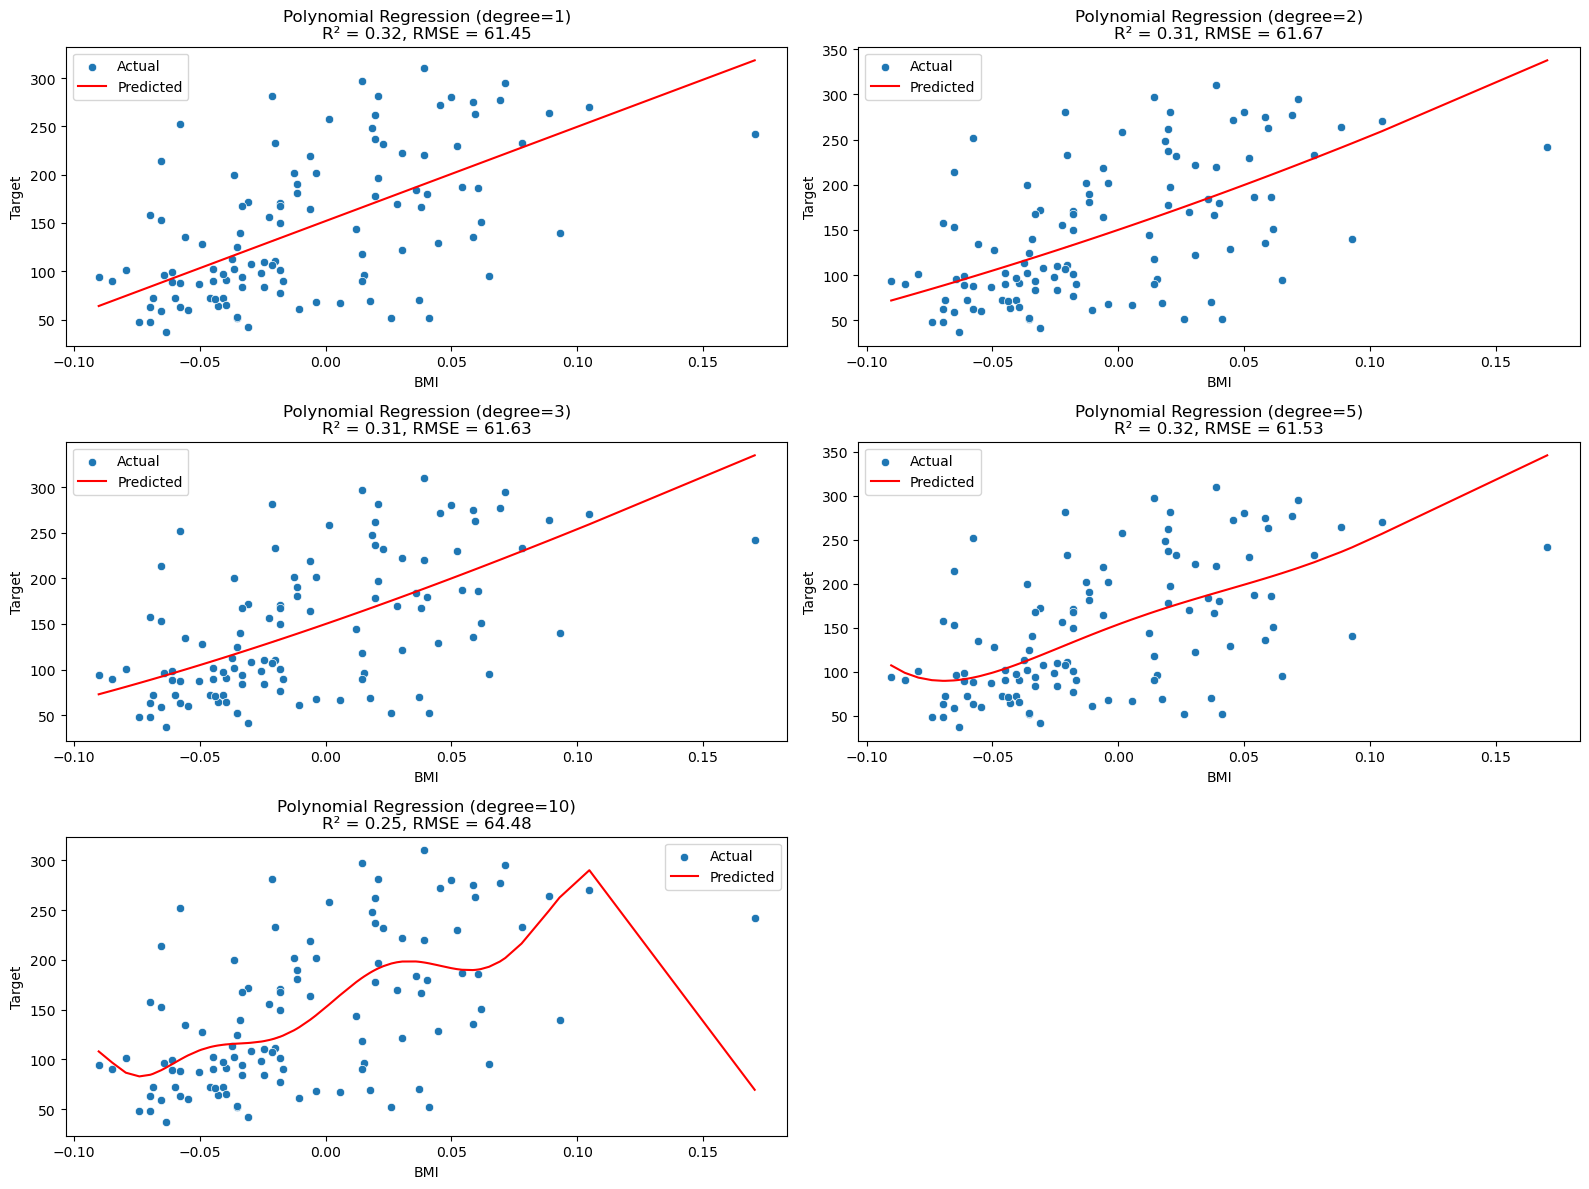

,Degree,MSE,MAE,RMSE,R²
0,1,3775.617202,49.805052,61.446051,0.317210
1,2,3803.656172,49.976078,61.673788,0.312139
2,3,3798.124860,49.925744,61.628929,0.313140
3,5,3785.759410,49.257663,61.528525,0.315376
4,10,4157.247556,51.207805,64.476721,0.248195


In [12]:
plt.figure(figsize=(16, 12))
for i, degree in enumerate(degrees, 1):
    yp_pred, mse, mae, rmse, r2 = evaluate_model(Xp_train, Xp_test, yp_train, yp_test, degree)
    results.append((degree, mse, mae, rmse, r2))

    # Plot predictions
    plt.subplot(3, 2, i)
    sns.scatterplot(x=Xp_test['bmi'], y=yp_test, label='Actual')
    sns.lineplot(x=Xp_test['bmi'], y=yp_pred, color='red', label='Predicted')
    plt.title(f"Polynomial Regression (degree={degree})\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
    plt.xlabel('BMI')
    plt.ylabel('Target')
    plt.legend()

plt.tight_layout()
plt.show()

# Display comparison table
comparison_df = pd.DataFrame(results, columns=['Degree', 'MSE', 'MAE', 'RMSE', 'R²'])
display(comparison_df)

### 4.1 Analysis Polynomial Regression
##### Degree = 1 (Linear)
- Fits a straight line.
- Underfits the actual relationship.
- Model too simple to capture non-linear trends.
##### Degree = 2 or 3 (Moderate Polynomial)
- Captures some curvature in the relationship.
- Improves R² on training, and often test set too.
- Can still miss complex behavior but better than linear.
- Good balance for single-feature modeling (e.g., bmi).
##### Degree = 6, 10, or higher
- Overfitting: the model starts capturing noise in the training data.
- R² drops on test set, and RMSE increases — poor generalization.
- Curve becomes wavy and unstable, especially with few data points.

### 4. Lasso Regression

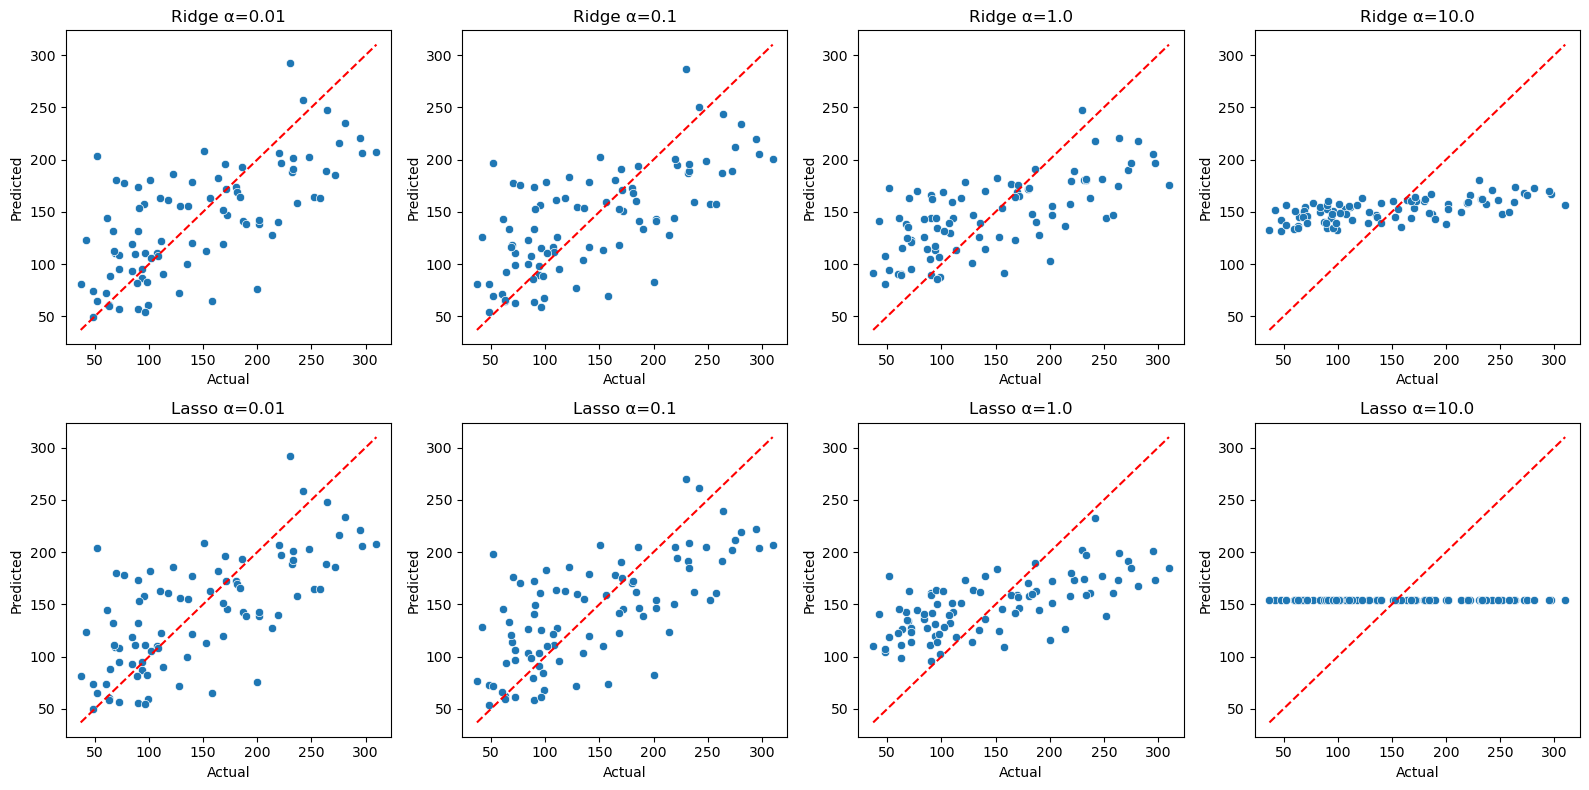

,Model,MAE,MSE,RMSE,R²
5,Lasso α=0.1,42.854428,2798.193485,52.897954,0.471855
1,Ridge α=0.1,42.996932,2856.486888,53.446112,0.460852
4,Lasso α=0.01,42.831847,2878.559386,53.652208,0.456686
0,Ridge α=0.01,42.836888,2882.290180,53.686965,0.455982
2,Ridge α=1.0,46.138858,3077.415939,55.474462,0.419153
6,Lasso α=1.0,49.730328,3403.575722,58.340172,0.357592
3,Ridge α=10.0,58.030756,4443.952637,66.662978,0.161226
7,Lasso α=10.0,64.006461,5361.533457,73.222493,-0.011963


In [13]:
# Features and target
lX = df.drop(columns='target')
ly = df['target']

# Train-test split
lX_train, lX_test, ly_train, ly_test = train_test_split(lX, ly, test_size=0.2, random_state=42)

# Alpha values
lalphas = [0.01, 0.1, 1.0, 10.0]

# Store results
lridge_results = []
llasso_results = []
# Collect coefficients
lasso_coefs = []
ridge_coefs = []

# Set up plot
plt.figure(figsize=(16, 8))

# Train and evaluate
for i, lalpha in enumerate(lalphas):
    # Ridge
    lridge = Ridge(alpha=lalpha)
    lridge.fit(lX_train, ly_train)
    ly_pred_ridge = lridge.predict(lX_test)
    ridge_coefs.append(lridge.coef_)
    lridge_results.append({
        'Model': f'Ridge α={lalpha}',
        'MAE': mean_absolute_error(ly_test, ly_pred_ridge),
        'MSE': mean_squared_error(ly_test, ly_pred_ridge),
        'RMSE': np.sqrt(mean_squared_error(ly_test, ly_pred_ridge)),
        'R²': r2_score(ly_test, ly_pred_ridge)
    })

    # Lasso
    llasso = Lasso(alpha=lalpha, max_iter=10000)
    llasso.fit(lX_train, ly_train)
    ly_pred_lasso = llasso.predict(lX_test)
    lasso_coefs.append(llasso.coef_)
    llasso_results.append({
        'Model': f'Lasso α={lalpha}',
        'MAE': mean_absolute_error(ly_test, ly_pred_lasso),
        'MSE': mean_squared_error(ly_test, ly_pred_lasso),
        'RMSE': np.sqrt(mean_squared_error(ly_test, ly_pred_lasso)),
        'R²': r2_score(ly_test, ly_pred_lasso)
    })

    # Plot Ridge
    plt.subplot(2, len(lalphas), i + 1)
    sns.scatterplot(x=ly_test, y=ly_pred_ridge)
    plt.plot([ly_test.min(), ly_test.max()], [ly_test.min(), ly_test.max()], '--r')
    plt.title(f'Ridge α={lalpha}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    # Plot Lasso
    plt.subplot(2, len(lalphas), i + 1 + len(lalphas))
    sns.scatterplot(x=ly_test, y=ly_pred_lasso)
    plt.plot([ly_test.min(), ly_test.max()], [ly_test.min(), ly_test.max()], '--r')
    plt.title(f'Lasso α={lalpha}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Combine and display results
lresults_df = pd.DataFrame(lridge_results + llasso_results)
lresults_df.sort_values(by='R²', ascending=False, inplace=True)
display(lresults_df)

Lasso Coefficients:
                     age         sex         bmi          bp          s1  \
Lasso α=0.01  35.347451 -231.906664  551.303242  341.313469 -483.567140   
Lasso α=0.1    0.000000 -152.664779  552.697775  303.365158  -81.365007   
Lasso α=1.0    0.000000   -0.000000  413.431848   34.830515    0.000000   
Lasso α=10.0   0.000000    0.000000    0.000000    0.000000    0.000000   

                      s2          s3          s4          s5         s6  
Lasso α=0.01  165.990532  -25.834899  216.875803  566.815003  49.702475  
Lasso α=0.1    -0.000000 -229.255776    0.000000  447.919525  29.642617  
Lasso α=1.0     0.000000   -0.000000    0.000000  258.152894   0.000000  
Lasso α=10.0    0.000000   -0.000000    0.000000    0.000000   0.000000  

Ridge Coefficients:
                     age         sex         bmi          bp          s1  \
Ridge α=0.01  40.693422 -237.008020  546.161792  341.809317 -430.146300   
Ridge α=0.1   42.855670 -205.494319  505.089033  317.093205 -

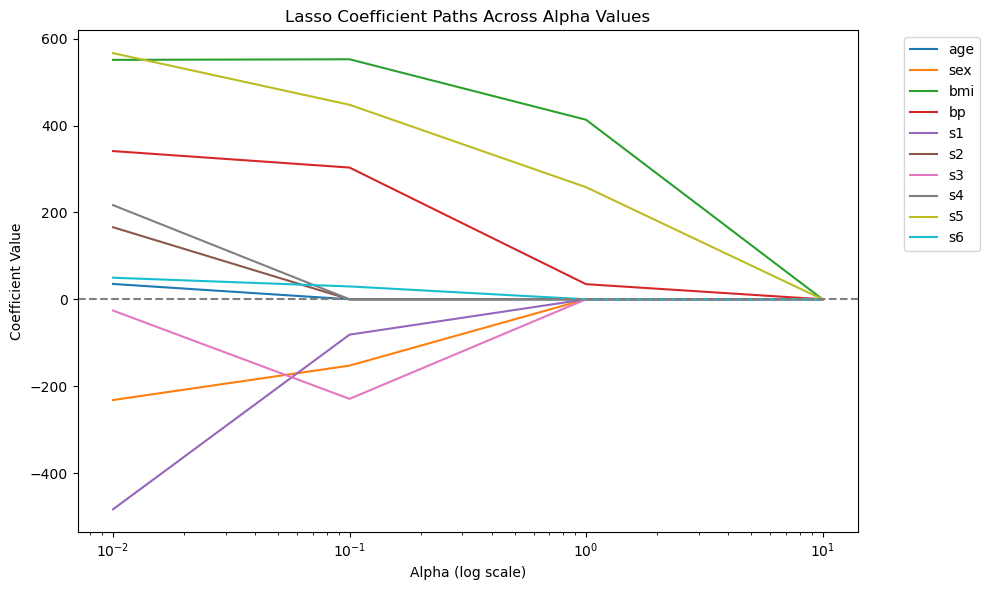

In [14]:
## Coefficients with different alpha values
lasso_df = pd.DataFrame(lasso_coefs, columns=data.columns, index=[f'Lasso α={a}' for a in lalphas])
ridge_df = pd.DataFrame(ridge_coefs, columns=data.columns, index=[f'Ridge α={a}' for a in lalphas])

# Show
print("Lasso Coefficients:\n", lasso_df)
print("\nRidge Coefficients:\n", ridge_df)

# Plot Lasso coefficients
plt.figure(figsize=(10, 6))
for feature in data.columns:
    coef_path = [lasso_df.loc[f'Lasso α={a}', feature] for a in lalphas]
    plt.plot(lalphas, coef_path, label=feature)

plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficient Paths Across Alpha Values")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 5.1 Analysis Lasso Regression
##### Lasso Regression Insights
- At α = 0.01, most features have non-zero coefficients (very little penalty).
- By α = 1.0, several coefficients are exactly zero as Lasso starts performing feature selection.
- At α = 10.0, only the most influential features (like bmi, s5, bp) remain active, others are zeroed out or near-zero.
##### Ridge Regression Insights
- Coefficients smoothly decrease as alpha increases.
- No feature is eliminated; all are retained regardless of alpha value.
- At high alpha (e.g., 10), the model becomes very conservative, with small-magnitude coefficients.

### 6. Key Observations

#### Model Performance:
- Multiple Linear Regression gave the best R² (0.45) and lowest error metrics.
- Ridge Regression closely followed, with better handling of correlated features.
- Lasso Regression sacrificed some accuracy for simplicity by zeroing out less relevant features.
#### Underfitting & Overfitting:
- Simple Linear and Polynomial (BMI-only) models underfit — they missed complex patterns and had low R².
- Polynomial regression did not improve over linear, suggesting the BMI–target relationship is mostly linear.
- Lasso avoided overfitting by shrinking irrelevant coefficients, but at α = 1.0, it over-penalized, reducing performance.
#### Insights About the Diabetes Dataset:
- Features bmi, s5 (a blood marker), and bp (blood pressure) are most predictive of disease progression.
- The dataset has mildly skewed target values — a log transform may help in some statistical applications.
- The features are already standardized, which simplifies model preparation and enhances compatibility with regularized regressions.
- There is multicollinearity among features like s1, s2, and s3 — making Ridge preferable in some cases.
#### Finally
- Use Multiple Linear Regression for best baseline performance.
- Apply Ridge when multicollinearity or model generalization is a concern.
- Use Lasso if model interpretability and feature selection are desired.
- BMI alone is not sufficient; multiple physiological markers jointly improve predictive power.

| Model                   | MAE   | RMSE  | R²   | Insight                                   |
|:----------------------- |:----- |:----- |:---- |:----------------------------------------- |
| **Simple Linear (BMI)** | 52.26 | 63.73 | 0.23 | Weak fit, underfitting                    |
| **Polynomial (BMI²)**   | 49.98 | 61.97 | 0.31 | Negligible improvement from simple regression                 |
| **Multiple Linear**     | 42.79 | 53.85 | 0.45 | Best performance                       |
| **Ridge Regression**    | 46.14 | 55.47 | 0.42 | Good generalization, smoother           |
| **Lasso Regression**    | 49.73 | 58.34 | 0.36 | Feature selection, but underfits a bit |
